1st part: define variables and functions
2nd part: run simulation calling functions and using variables

In [87]:
import math	
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random

max_dict = {
    "r": [0, 100], 
    "n": [1, 300], 
    "alpha": [2, 1.5], 
    "gamma": [3, 0.001], 
    "s_max": [4, 1500], 
    "mus": [5, 0.1],
    "mui": [6, 0.5],
    "muv": [7, 10]
    }

def gen(a,k):
    return abs(math.sin(a**2*+3*k**3-a*k**4+36*a+k+12))

def values(a):

    # the global declaration means that the variable can be used outside the function by another function.
    global alpha
    global mus
    global r
    global s_max
    global gamma
    global mui
    global muv
    global n

    #max_dict["alpha"][1] is the maximim value of alpha and max_dict["alpha"][0] is the index k
    alpha = max_dict["alpha"][1]*gen(a, max_dict["alpha"][0])
    mus = max_dict["mus"][1]*gen(a, max_dict["mus"][0])
    r = max_dict["r"][1]*gen(a, max_dict["r"][0])
    s_max = max_dict["s_max"][1]*gen(a, max_dict["s_max"][0])
    gamma = max_dict["gamma"][1]*gen(a, max_dict["gamma"][0])
    mui = max_dict["mui"][1]*gen(a ,max_dict["mui"][0])
    muv = max_dict["muv"][1]*gen(a ,max_dict["muv"][0])
    n = max_dict["n"][1]*gen(a, max_dict["n"][0])
    return #this function doesn't return any specific values, but set the values of several global variables.


def uninfected_steady_state(a):

    values(a)

    return [
        (r - mus + math.sqrt((r - mus)**2 + (4*alpha*r/s_max)))*s_max/2/r, 
        0, 
        0
    ]

def infected_steady_state(a):

    values(a)

    return [
        muv/(gamma*n), 
        alpha/mui - (mus*muv)/(gamma*mui*n) + ((muv*r)/(gamma*mui*n))*(1-(muv/(gamma*n*s_max))), 
        alpha*n/muv - mus/gamma + ((r/gamma)*(1-(muv/(gamma*n*s_max))))
    ]

def reproduction_ratio(a):
    
    values(a)

    return gamma*n*uninfected_steady_state(a)[0]/muv

def n_parameters(a):

    values(a)
    
    return[
        (gamma**2)*mui*s_max - 4*alpha*(mui + muv),
        - 2*gamma*mui*muv*((mui**2 + 3*mui*muv + muv**2)*s_max - 4*alpha*(mui + muv)),
        muv*(mui**4 + 2*(mui**2)*muv*(3*mui - 2*mus) + 6*mui*(muv**3) + mui*(muv**2)*(11*mui - 4*mus) + muv**4)
    ]

def r_parameters(a):

    values(a)

    return [
        (muv**4)*(mui + muv),
        gamma*(muv**2)*n*s_max*(-gamma*mui*muv*n*s_max + 2*alpha*gamma*mui*n + 2*alpha*gamma*muv*n + (mui**2)*muv + muv**3),
        (n**2)*(gamma**2)*(s_max**2)*(alpha*gamma*(muv**3)*n + alpha*gamma*mui*muv*n*(mui + muv) + (alpha**2)*(gamma**2)*(n**2)*(mui + muv) + mui*mus*muv**3),
    ]

def state_is_in_P(a):

    values(a)

    [an, bn, cn] = n_parameters(a)
    [ar, br, cr] = r_parameters(a)
    root_1 = (-bn + (bn**2 -4*an*cn)**0.5)/(2*an)
    root_2 = (-bn - (bn**2 -4*an*cn)**0.5)/(2*an)

    return n > max(root_1, root_2) and ar*r**2+br*r+cr < 0 
    #the last statement is equivalent to have the value of r between r1 and r2
    #output: true = state is in P, false = state is not in P

def theorem_1(a):

    if (reproduction_ratio(a) < 1): 
        return "The uninfected steady state is the unique physically relevant steady state and it is asymptotically stable." 
    elif (state_is_in_P(a)):
        return "The uninfected and the infected steady states are both physically relevant" + '\n' + " and the infected steady state is unstable"

    return "The uninfected and the infected steady states are both physically relevant "+ '\n' " and the the infected steady state is asymptotically stable"

# ------------------- Defining the function that returns dy/dt -------------------

for a in range(0,5): 
   print ("For a = ", a, ": ", theorem_1(a))

def virus_propagation(y, t, re, nv, al, g, sm, mu_s, mu_i, mu_v):
    
    s, i, v = y
    return [
        al - mu_s*s + re*s*(1 - s/sm) - g*v*s,
        g*v*s - mu_i*i,
        nv*mu_i*i - mu_v*v
    ]


For a =  0 :  The uninfected and the infected steady states are both physically relevant
 and the infected steady state is unstable
For a =  1 :  The uninfected and the infected steady states are both physically relevant 
 and the the infected steady state is asymptotically stable
For a =  2 :  The uninfected and the infected steady states are both physically relevant 
 and the the infected steady state is asymptotically stable
For a =  3 :  The uninfected and the infected steady states are both physically relevant 
 and the the infected steady state is asymptotically stable
For a =  4 :  The uninfected steady state is the unique physically relevant steady state and it is asymptotically stable.


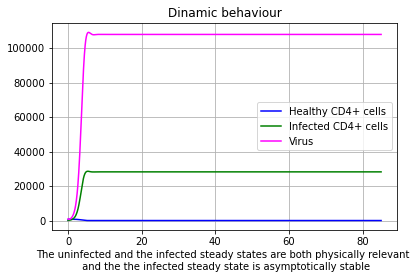

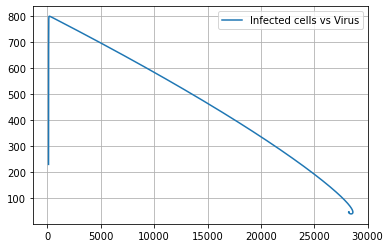

In [13]:
# ----------------  Call the function that set the parameters----------------------

# PARAMETER CHOICE FOR SIMULATION -------------------------------------------------

#for i in range (0, 12): 
#   print("\nFor parameter a = ", i, theorem_1(i))

# Running simulation --------------------------------------------------------------

parameter = 1

values(parameter)

# ---------------- Setting the initial conditions----------------------------------

inititial_healthy_tcells = 230
inititial_infected_tcells = 100
initial_virus = 1000

y0 = [inititial_healthy_tcells, inititial_infected_tcells, initial_virus]

# ----------------Setting the time and discretization points ----------------------

initial_time = 0
final_time = 85 #2000
discretization_points = 2500 #5000 

timePoints = np.linspace(initial_time, final_time, discretization_points)



solution = odeint(virus_propagation, y0, timePoints, args=(r, n, alpha, gamma, s_max, mus, mui, muv))

s_t = solution[:,0]
i_t = solution[:,1]
v_t = solution[:,2]

txt1 = "system uninfected steady state is stable."
txt2 = "system infected steady state is asymptotically stable."
txt3 = "system infected steady state is unstable."

def dynamic_plot():

    
    axis = plt.subplot()
    axis.plot(timePoints, s_t, color='blue', label='Healthy CD4+ cells')
    axis.plot(timePoints, i_t, color='green', label='Infected CD4+ cells')
    axis.plot(timePoints, v_t, color='magenta', label='Virus')
    axis.set_title('Dinamic behaviour')

    # PLOTTING
    
    plt.text(0.5 , -0.15, theorem_1(parameter), horizontalalignment='center', verticalalignment='center', transform=axis.transAxes)
    plt.legend()
    plt.tight_layout()
    plt.grid()

    plt.show()


def phase_plot(a, b, lab):

    axis = plt.subplot()
    axis.plot(a, b, label=lab)
   

    plt.legend()
    plt.grid()
    plt.show()



dynamic_plot()
phase_plot(i_t, s_t, 'Infected cells vs Virus')

In [14]:
uninfected_steady_state_array = uninfected_steady_state(parameter)
infected_steady_state_array = infected_steady_state(parameter)

print(uninfected_steady_state_array)
print(infected_steady_state_array)

state_list = ["S", "I", "V"]

print("\nUninfected steady state (S_0, I_0, V_0):")
for i in range(0, len(uninfected_steady_state_array)): print(state_list[i],"_0 = ", uninfected_steady_state_array[i])
print("\n")

print("\nInfected steady state (S_1, I_1, V_1):")
for i in range(0, len(infected_steady_state_array)): print(state_list[i],"_1 = ", infected_steady_state_array[i])
print("\n")

[804.0450589712977, 0, 0]
[46.235754770340066, 28268.347221214317, 107970.23231641331]

Uninfected steady state (S_0, I_0, V_0):
S _0 =  804.0450589712977
I _0 =  0
V _0 =  0



Infected steady state (S_1, I_1, V_1):
S _1 =  46.235754770340066
I _1 =  28268.347221214317
V _1 =  107970.23231641331




In [63]:
uninfected_scalar_steady_matrix = np.zeros((3, 3)) # matrix without diffusion coefficient for uninfected_steady_state 
                                                   # (to be multiplied by delta_time) and to be added to identity matrix
dv = 0.1
delta_time = 1 # days
delta_area = 1*1 # grid 21x21

uninfected_steady_matrix = [[(-mus + r - (2*r*uninfected_steady_state_array[0])/s_max), 0, -gamma*uninfected_steady_state_array[0]], 
                            [0, -mus, gamma*uninfected_steady_state_array[0]], 
                            [0, n*mui, muv - ((4*dv)/delta_area)]]

print(uninfected_steady_matrix)
                        

[[-76.74959008914617, 0, -0.5388944572152705], [0, -0.07958058429196471, 0.5388944572152705], [0, 11.954358433024934, 5.830829462907597]]


In [111]:
I_tester_matrix = [[0,1,2],[3,4,5],[6,7,8]]

#for k in range (0,3):
#    for i in range (0,3): 
#        for j in range(0,4):
#            I_tester_matrix[i][j] = I_tester_matrix[i][j] + k

#print(I_tester_matrix)


V_tester_matrix = [[10, 20, 30], [40, 50, 60], [70, 80, 90]]
#print(V_tester_matrix)

for k in range (0,2):
    for i in range (0,3): 
        for j in range(0,3):
            I_tester_matrix[i][j] = I_tester_matrix[i][j] + k
            V_tester_matrix[i][j] = V_tester_matrix[i][j]+I_tester_matrix[i][j]

#print(V_tester_matrix)

S_discr = np.zeros((22,22))
I_discr = np.zeros((22,22))
V_discr = np.zeros((22,22))

for i in range (1,21): # filling initial states...
    for j in range (1,21):
        S_discr[i][j] = np.random.uniform(0,1)
        I_discr[i][j] = np.random.uniform(0,1)
        V_discr[i][j] = np.random.uniform(0,1)

# testing 0-padding for matrix boundary index i - first and last rows zero padded

print(V_discr[0, :])
print(V_discr[1, :])
print(V_discr[20,:])
print(V_discr[21,:])

# testing 0-padding for matrix boundary index j - first and last cols zero padded

print(V_discr[:, 0])
print(V_discr[:, 1])
print(V_discr[:,20])
print(V_discr[:,21])


for k in range (0,300): # number of time steps
    for i in range (0,21): # filling matrix starting from (S,I,V)(t0)...
        for j in range (0,21):
            S_discr[i][j] = ((-mus + r - (2*r*uninfected_steady_state_array[0])/s_max)*S_discr[i][j] - (gamma*uninfected_steady_state_array[0])*V_discr[i][j])*delta_time + S_discr[i][j]
            I_discr[i][j] = ((-mus*I_discr[i][j]) + (gamma*uninfected_steady_state_array[0])*V_discr[i][j])*delta_time + I_discr[i][j]
            V_discr[i][j] = (n*mui*I_discr[i][j]-(dv/delta_area)* (V_discr[i+1][j] + V_discr[i-1][j] -4*V_discr[i][j] + V_discr[i][j+1]+V_discr[i][j-1]))*delta_time + V_discr[i][j]

#array_of_state_matrices = [S_discr, I_discr, V_discr] # How to use matrix notation by Eugenio?







[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.49309454 0.98830623 0.6167092  0.2295476  0.2067958
 0.91849848 0.06602162 0.31052108 0.28553159 0.17939866 0.80354581
 0.66630975 0.65734315 0.3562666  0.32683765 0.89930512 0.76787896
 0.53306973 0.29577057 0.54077667 0.        ]
[0.         0.85094195 0.30470569 0.0747768  0.17658656 0.70553971
 0.15375457 0.04705063 0.03669555 0.05327858 0.75816848 0.40269984
 0.81674807 0.53799883 0.81427216 0.50179926 0.05025327 0.60050216
 0.80691481 0.00111958 0.76378536 0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.49309454 0.83733428 0.02336501 0.45566976 0.34715656
 0.8352456  0.55283549 0.83932517 0.24420544 0.64872885 0.61133085
 0.27964065 0.99290754 0.00898563 0.17253243 0.58968978 0.56629319
 0.70212778 0.77363085 0.85094195 0.        ]
[0.         0.54077667 0.8857466  0.05036423 0.76441956 

<ipython-input-111-1be72acf2cac>:50: RuntimeWarning: overflow encountered in double_scalars
  S_discr[i][j] = ((-mus + r - (2*r*uninfected_steady_state_array[0])/s_max)*S_discr[i][j] - (gamma*uninfected_steady_state_array[0])*V_discr[i][j])*delta_time + S_discr[i][j]
<ipython-input-111-1be72acf2cac>:50: RuntimeWarning: invalid value encountered in double_scalars
  S_discr[i][j] = ((-mus + r - (2*r*uninfected_steady_state_array[0])/s_max)*S_discr[i][j] - (gamma*uninfected_steady_state_array[0])*V_discr[i][j])*delta_time + S_discr[i][j]
